# Digitizing analogue text and summarization
### Using Optical Character Recognition (OCR)
### and Natural Language Processing (NLP)
#### With State-of-the-Art tools
### Google Vision and OpenAI GTP-3
* The OCR works with both handwritten and printed digital text
* There is a need to choose both OCR and NLP parameters for optimal output, given the type of text
* There is a need to have both Google Vision and OpenAI Application Program Interface (API) keys, which can be created on their websites by creating an account (free to some extent).
  * https://cloud.google.com/vision (2022-02-04)
  * https://beta.openai.com/ (2022-02-04)

### 0) If you would like the original code:

Thanks to Maja Linderholm, out Master's Thesis Student working for INTERACT III; WP6, it can be accessed by running the cell below

In [ ]:
print(">>>Fetching the code for implementation")
!git clone https://github.com/MSkogsmo/ocr-nlp-interact-III-demo.git

### 1) Fetch and install tools, run the so called "cells" below py pressing play or [ctrl+enter]

In [1]:
# Run to fetch and install tools
print(">>>Installing the tool Google Cloud Vision")
!pip install --upgrade google-cloud-vision
print(">>>Installing the tool OpenAI")
!pip install openai
print(">>>Remember to restart the runtime")

>>>Fetching the code for implementation
Cloning into 'ocr-nlp-interact-III-demo'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 53 (delta 10), reused 50 (delta 7), pack-reused 0
Unpacking objects: 100% (53/53), done.
>>>Installing the tool Google Cloud Vision
     |████████████████████████████████| 370 kB 6.9 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 111 kB 55.0 MB/s 
     |████████████████████████████████| 1.1 MB 49.7 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
ERROR: pip's dependency resolver does not currently t

>>>Installing the tool OpenAI
     |████████████████████████████████| 40 kB 4.0 MB/s 
     |████████████████████████████████| 161 kB 10.5 MB/s 
     |████████████████████████████████| 242 kB 64.9 MB/s 
  Created wheel for openai: filename=openai-0.14.0-py3-none-any.whl size=49824 sha256=55cde286b0d9b891de0e52e957647fde9fd3cd5486393d8d63707b465a07692e
  Stored in directory: /root/.cache/pip/wheels/45/5f/9e/6035f88eb6fc313fd26ddb4d4b65bfb6fa02d7e5a124160fe9
Successfully built openai
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


>>>Remember to restart the runtime


### 2) ^^^ Remember to restart runtime, by clicking the button
### 3) Import the tools

In [16]:
# Import tools
import os, io
import json
from google.cloud import vision_v1 as vision
import openai
import sys
from google.cloud.vision_v1 import types
import pandas as pd

### 4) Add your API keys from Google Vision and OpenAI in the appropriate format, "a how to" and examples can be found below

In [ ]:
#how to

### 5) Make it into a nice format for the tools, by running the cell below

In [17]:
# Create key files from variables (created at service portal) for Google Vision API and OpenAI API
from keys_variables import *  

json_object = json.dumps(google_vision_api_key_dictionary, indent = 4)
with open("/content/key_vision.json", "w") as outfile:
    outfile.write(json_object)

with open('/content/key_gpt3.txt', 'w') as writefile:
    writefile.write(openAI_api_key_string)

### 6) Define useful functionality, by running the cell below

In [18]:
###Functionalities###

#Function for performing OCR on an image
def detect_text(img):
    # Open image
    with open(img, 'rb') as image_file:
        content = image_file.read()
    # Initialize a Google Cloud Vision client
    client = vision.ImageAnnotatorClient()
    #Define input and perform ocr to get the response
    image = vision.types.Image(content=content)
    response = client.document_text_detection(
      image=image,
      image_context = {"language_hints": ['en']} #english text
      )
    return response

#Help function to write and read text file
def write_and_read_text_file(path_file_and_name, response):
  file = io.open(path_file_and_name, 'w', encoding='utf-8')
  file.write(response.full_text_annotation.text)
  file.close()
  text_file = open(path_file_and_name, "r", encoding='utf-8')
  text = text_file.read()
  return text

#Function for performing NLP Summarizations on a text
def get_summary(text):
  response = openai.Completion.create(
    engine = "davinci-instruct-beta",
    prompt = text,
    temperature = 0.3,
    max_tokens = 400,
    top_p = 1.0,
    frequency_penalty = 0.0,
    presence_penalty = 0.0,
    stop=["###"]
    )
  return response

### 7) Import the text image you would like to summarize, by clicking the 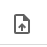button in the left sidebar and change the filename below accordingly


In [ ]:
# Define image file name and path
FILE_NAME = 'Sample-handwritten-text-from-CVL-Database.png'
FOLDER_PATH = r'/content/'

### 8) Run OCR, by running the cell below

In [23]:
###Running OCR###

# Provide the API key with the Google Cloud Vision API
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'key_vision.json'

#Detect text in image file, function exists in demo_functions.py
response = detect_text(os.path.join(FOLDER_PATH, FILE_NAME))

#Specify text file file location and write text file, requested format by GTP-3
path_file_and_name = 'detected_text.txt'
text = write_and_read_text_file(path_file_and_name, response)

### 9) Run Summarization with GPT-3, by running the cell below

In [24]:
###Running NLP Summarization###

#Access the OpenAI API-key
key = open("key_gpt3.txt", "r")
openai.api_key = key.read()

#Run the text that is about to be summarized
response = get_summary(text)


### 10) Print the result, by running the cell below

In [27]:
print("Original text:")
print(text)
print("")
print("Summarized text:")
print(response.choices[0]["text"])

Original text:
Imagine a vast sheep of paper on which araight
Lines, Iriangler, squares, Pentagons, Hexagons,
and other figures, instead of remaining fired
their placer, move
freely about, on on in the sunfors,
but without the power of riving above or sinking
below it, very much like shadows only hard and
-
with luminious edges and will then have a pretty
correct notion of my country and countrymen. Alas, a
few years ago, I should have said my universe: bat
"
now my minde has been opened to higher views of
Mhing
you
3


Summarized text:

The paper sheep is a metaphor for the universe.

The paper sheep is a metaphor for the universe.


### 11) Ta-Da!

This is made for just one file, but what if you would modify this code to go through a while folder of images...?